# Trees and Forests

![](https://cdn.shopify.com/s/files/1/0326/7189/t/65/assets/pf-e820b2e0--mother-tree-forest_1200x.jpg?v=1619557558)

မင်္ဂလာပါ။ Week 16 မှ ကြိုဆိုပါတယ်။ ဒီနေ့ ဆွေးနွေးလေ့လာမှာကတော့ Decision Tree နဲ့ Random Forest တို့ပဲ ဖြစ်ပါတယ်။ 

အောက်မှာ Decision Tree နမူနာတခုကို ပြထားပါတယ်။

![](https://forum.huawei.com/enterprise/en/data/attachment/forum/202103/24/190400o09x7rhnnhy2yon7.png?1.png)

Decision Tree တွေဟာ နားလည်ရ၊ ရှင်းပြရလဲ လွယ်ပါတယ်။ 

အခု စစချင်းမှာ နမူနာနဲ့ စပါမယ်။

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, tree, cluster, model_selection, metrics

# 1. load the data
df_X, ds_y = datasets.load_digits(n_class=2, return_X_y=True, as_frame=True)

# 2. split into train and test sets
tr_X, ts_X, tr_y, ts_y = model_selection.train_test_split(df_X, ds_y, random_state=42)

# 3. some feature engineering
kmean = cluster.KMeans()
feat_tr_X = kmean.fit_transform(tr_X)
feat_ts_X = kmean.transform(ts_X)

# 4. build tree model
tree_model = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3, max_features=3, max_leaf_nodes=3, random_state=24)
tree_model.fit(feat_tr_X, tr_y)

# 5. test the model
pred_y = tree_model.predict(feat_ts_X)

print (metrics.classification_report(y_true=ts_y, y_pred=pred_y))

စမ်းကြည့်နေတဲ့သူတောင် အံ့သြသွားတယ်။ 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
tree.plot_tree(tree_model)

ကဲ ... နောက်ထပ် Regression ပုစ္ဆာတခုကို စမ်းကြည့်ရအောင်။

In [ ]:
from sklearn import preprocessing

# 1. load the data
df_X, ds_y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# 2. split into train and test sets
tr_X, ts_X, tr_y, ts_y = model_selection.train_test_split(df_X, ds_y, random_state=42)

# 3. some feature engineering
kmean = cluster.KMeans()
feat_tr_X1 = kmean.fit_transform(tr_X.values[:, -2:])
feat_ts_X1 = kmean.transform(ts_X.values[:, -2:])

# 4. more feature engineering 
# note preprocessing.Normalizer and preprocessing.normalize can't be used 
# because they have no memory
max_values = np.max(tr_X.values[:, :-2], axis=0)
feat_tr_X2 = tr_X.values[:, :-2]/max_values
feat_ts_X2 = ts_X.values[:, :-2]/max_values

# 5. glue them back up
feat_tr = np.concatenate((feat_tr_X1, feat_tr_X2), axis=1)
feat_ts = np.concatenate((feat_ts_X1, feat_ts_X2), axis=1)

# 6. build the model
tree_model = tree.DecisionTreeRegressor(criterion="squared_error", max_depth=3, max_features=3, max_leaf_nodes=3, random_state=44)
tree_model.fit(feat_tr, tr_y)

# 7. test the model
pred_y = tree_model.predict(feat_ts)

metrics.r2_score(ts_y, pred_y)

In [ ]:
tree.plot_tree(tree_model)

## Intuition behind Decision Tree

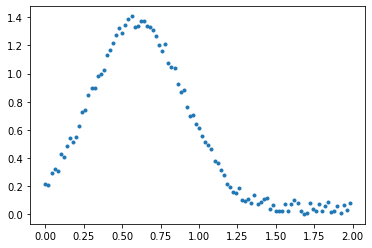

In [31]:
from scipy import stats
from sklearn import linear_model

np.random.seed(42)

x = np.linspace(0, 2, 1000)
y = stats.norm.pdf(x, loc=0.6, scale=0.3) + np.random.random(1000) * 0.1

plt.scatter(x[::10], y[::10], marker=".")
plt.show()

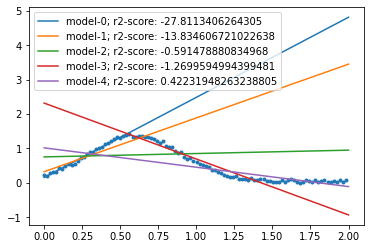

In [32]:
def build_and_draw_linear_model(idx, x, y, idx_start=0, idx_limit=1000):
    sample_idx = np.random.choice(idx[idx_start:idx_limit], size=100, replace=False)
    m = linear_model.LinearRegression()
    m.fit(x[sample_idx].reshape((-1, 1)), y[sample_idx])
    y_pred = m.predict(x.reshape((-1, 1)))
    plt.plot(x, y_pred, label="model-{}; r2-score: {}".format(i, metrics.r2_score(y, y_pred)))

plt.scatter(x[::10], y[::10], marker=".")
idx = np.arange(1000)
for i in range(5):
    build_and_draw_linear_model(idx, x, y, idx_start = 0 if i < 3 else (i - 1) * 150, idx_limit=(i + 1) * 200)

plt.legend()
plt.show()

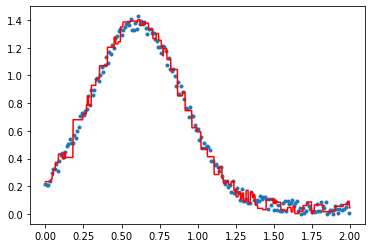

In [36]:
plt.scatter(x[::5], y[::5], marker=".")
sample_idx = np.random.choice(idx, size=100, replace=False)
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(x[sample_idx].reshape((-1, 1)), y[sample_idx])

y_pred = tree_model.predict(x.reshape((-1, 1)))
plt.plot(x, y_pred, color="red")
plt.show()

In [ ]:
# print r2-score of the tree_model